# MNIST for LDA, QDA, MLP

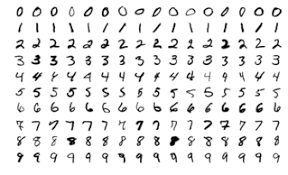

MNIST手寫辨識資料庫是[Yann Lecun](http://yann.lecun.com/exdb/mnist/)開源給大家用的一個資料庫，同時為深度學習課程必備用來授課使用的資料集 

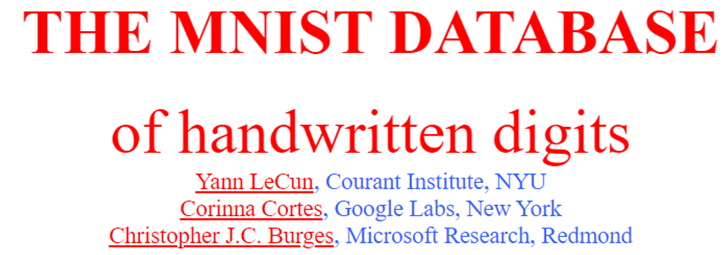

其內容主要目的是要辨識手寫數字的圖片，有(0, 1, 2, 3, 4, 5, 6, 7, 8 ,9)共十類，每張圖片長寬為28*28


訓練資料(Training set)有60,000 張圖
測試資料(Test set)有10,000 張圖

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import cv2

label_train,label_test=[],[]
with open('train_label.txt','r') as f:
    for line in f.readlines():
        label_train.append(int(line))
        
with open('test_label.txt','r') as f:
    for line in f.readlines():
        label_test.append(int(line))
        
label_train = np.array(label_train)
label_test = np.array(label_test)



data_train = np.zeros((60000,784))
data_test = np.zeros((10000,784))
cap = cv2.VideoCapture('mnist_train_image.avi')
c=0
while cap.isOpened():
    ret, frame = cap.read()
    if ret==False:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = np.reshape(frame,(1,784))
    data_train[c,:]=frame
    c+=1
print('number of training:{}'.format(c))
cap.release()
cv2.destroyAllWindows()


cap = cv2.VideoCapture('mnist_test_image.avi')
c=0
while cap.isOpened():
    ret, frame = cap.read()
    if ret==False:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = np.reshape(frame,(1,784))
    data_test[c,:]=frame
    c+=1
cap.release()
cv2.destroyAllWindows()
print('number of test:{}'.format(c))


number of training:60000
number of test:10000


In [3]:
data_test.shape


(10000, 784)

In [5]:
"""
Created on Mon Apr 25 22:04:15 2022

@author: glanb
"""
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import time


qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(data_train, label_train)
y_pred=qda.predict(data_train)


acc = (y_pred==label_train).sum()/len(label_train)
print('acc(train, QDA):{:.2f}%'.format(acc*100))
y_pred = qda.predict(data_test)
acc = (y_pred==label_test).sum()/len(label_test)
print('acc(test, QDA):{:.2f}%'.format(acc*100))


acc(train, QDA):89.57%
acc(test, QDA):82.27%


NameError: name 'confusion_matrix' is not defined

In [6]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred, label_test)
cm

array([[910,   0,  15,  14,   5,  12,  30,   1,  16,   7],
       [  0, 981,   1,   2,   2,   0,   4,   9,  12,   6],
       [ 14,  14, 882,  33,  27,  10,  26,  10,  18,   6],
       [ 17,  18,  41, 805,   9, 112,   4,  18,  59,  13],
       [  0,  13,   6,   2, 783,   2,   3,  19,   4,  41],
       [  6,   1,   2,  16,   5, 573,  17,   3,  18,   1],
       [  6,   7,   6,   3,   6,  20, 855,   0,   4,   0],
       [  1,   0,   3,   6,  13,   5,   0, 753,   5,  46],
       [ 26, 100,  74, 104,  29, 143,  19,  27, 819,  23],
       [  0,   1,   2,  25, 103,  15,   0, 188,  19, 866]], dtype=int64)

acc(test, PCA(1, by training ACC)+QDA):30.84%
implement time (PCA+QDA) :0.01106s
acc(test, PCA(2, by training ACC)+QDA):45.79%
implement time (PCA+QDA) :0.01704s
acc(test, PCA(3, by training ACC)+QDA):50.06%
implement time (PCA+QDA) :0.02004s
acc(test, PCA(4, by training ACC)+QDA):62.68%
implement time (PCA+QDA) :0.02104s
acc(test, PCA(5, by training ACC)+QDA):72.86%
implement time (PCA+QDA) :0.02404s
acc(test, PCA(6, by training ACC)+QDA):80.05%
implement time (PCA+QDA) :0.02836s
acc(test, PCA(7, by training ACC)+QDA):83.53%
implement time (PCA+QDA) :0.03701s
acc(test, PCA(8, by training ACC)+QDA):86.26%
implement time (PCA+QDA) :0.04332s
acc(test, PCA(9, by training ACC)+QDA):87.76%
implement time (PCA+QDA) :0.04614s
acc(test, PCA(10, by training ACC)+QDA):89.27%
implement time (PCA+QDA) :0.04791s
acc(test, PCA(11, by training ACC)+QDA):90.00%
implement time (PCA+QDA) :0.05518s
acc(test, PCA(12, by training ACC)+QDA):91.65%
implement time (PCA+QDA) :0.05884s
acc(test, PCA(13, by trai

acc(test, PCA(102, by training ACC)+QDA):95.78%
implement time (PCA+QDA) :0.75874s
acc(test, PCA(103, by training ACC)+QDA):95.82%
implement time (PCA+QDA) :0.78421s
acc(test, PCA(104, by training ACC)+QDA):95.82%
implement time (PCA+QDA) :0.79347s
acc(test, PCA(105, by training ACC)+QDA):95.78%
implement time (PCA+QDA) :0.77675s
acc(test, PCA(106, by training ACC)+QDA):95.70%
implement time (PCA+QDA) :0.80864s
acc(test, PCA(107, by training ACC)+QDA):95.81%
implement time (PCA+QDA) :0.82068s
acc(test, PCA(108, by training ACC)+QDA):95.79%
implement time (PCA+QDA) :0.84668s
acc(test, PCA(109, by training ACC)+QDA):95.78%
implement time (PCA+QDA) :0.84626s
acc(test, PCA(110, by training ACC)+QDA):95.73%
implement time (PCA+QDA) :0.88377s
acc(test, PCA(111, by training ACC)+QDA):95.66%
implement time (PCA+QDA) :0.87704s
acc(test, PCA(112, by training ACC)+QDA):95.64%
implement time (PCA+QDA) :0.89576s
acc(test, PCA(113, by training ACC)+QDA):95.70%
implement time (PCA+QDA) :0.90566s
acc(

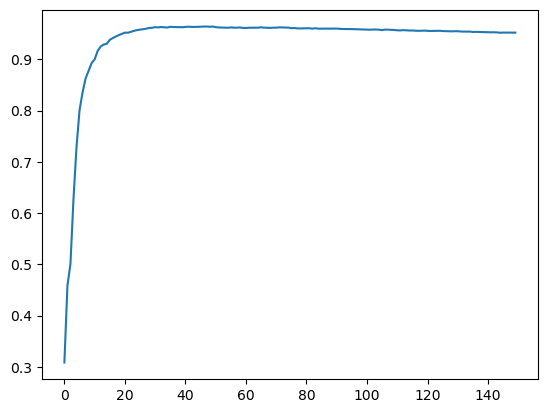

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=150)
pca.fit(data_train)
data_pca = pca.transform(data_train)
data_pca_test = pca.transform(data_test)

acc_pca=[]
for pos in range(150):
    st = time.time()
    qda_pca = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred_pca = qda_pca.fit(data_pca[:, 0:pos + 1], label_train).predict(data_pca_test[:, 0:pos + 1])
    acc = (y_pred_pca == label_test).sum() / len(label_test)
    print('acc(test, PCA({}, by training ACC)+QDA):{:.2f}%'.format(pos + 1, acc * 100))
    print('implement time (PCA+QDA) :{:.5f}s'.format(time.time()-st))
    acc_pca.append(acc)

plt.plot(acc_pca)
plt.show()

In [6]:
pos = np.argmax(np.array(acc_pca))
st = time.time()
qda_pca = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred_pca = qda_pca.fit(data_pca[:, 0:pos + 1], label_train).predict(data_pca_test[:, 0:pos + 1])
acc = (y_pred_pca == label_test).sum() / len(label_test)
print('acc(test, PCA({}, by training ACC)+QDA):{:.2f}%'.format(pos + 1, acc * 100))
print('implement time (PCA+QDA) :{:.5f}s'.format(time.time()-st))
acc_pca.append(acc)


acc(test, PCA(48, by training ACC)+QDA):96.41%
implement time (PCA+QDA) :0.29653s


In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

clf_mlp = MLPClassifier(solver='lbfgs',
                        activation='logistic',
                        alpha=1e-5,
                        hidden_layer_sizes=(100,100,100),
                        batch_size=1000,
                        max_iter=1000,
                        random_state=1)
'''
structure: 784 -> 2000 -> 10,  
Parameter: 784*2000 + 2000*10 = 1,588,000
acc(test, MLP):97.83%
implement time (MLP) :550.42365s
'''
'''
structure: 784 -> 100 -> 100 -> 10,  
Parameter: 784*100 + 100*100 + 100*10 = 89,400
acc(test, MLP):95.12%
implement time (MLP) :1277.10160s
'''
st = time.time()
clf_mlp.fit(data_train, label_train)
y_pred = clf_mlp.predict(data_test)
cm = confusion_matrix(y_pred, label_test)
acc = np.diag(cm).sum()/cm.sum()
print('acc(test, MLP):{:.2f}%'.format(acc * 100))
print('implement time (MLP) :{:.5f}s'.format(time.time()-st))


acc(test, MLP):97.83%
implement time (MLP) :550.42365s
